In [111]:
import pandas as pd

df = pd.read_csv("../data_raw/rainfall_data.csv")
df.head(2)

df_year2000 = df.query("YEAR>=2000").dropna()
df_year2000.head(20)

df_year2000 = df_year2000[df_year2000["YEAR"] >= 2000].dropna()

df_year2000.to_csv('../data/processed/rainfall2000_2017.csv', index=False)





In [112]:
df_year2000_bycountry= df_year2000.groupby('SUBDIVISION')['ANNUAL'].describe()
df_year2000_bycountry.head(5)
df_year2000_bycountry.to_csv("../reports/rainfall_summary_2000_2017.csv")


In [113]:
df_plot = df_year2000_bycountry[['mean']].sort_values('mean').reset_index()

df_plot.head()


,SUBDIVISION,mean
0,West Rajasthan,317.772222
1,Haryana Delhi & Chandigarh,460.055556
2,Punjab,491.222222
3,Saurashtra & Kutch,585.016667
4,East Rajasthan,626.450000


Text(0.5, 1.0, 'Mean unemployment by country over sample')

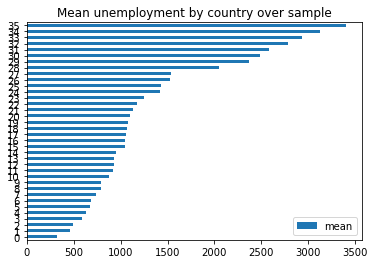

In [114]:
import matplotlib.pyplot as plt
df_plot.plot(kind = 'barh')
plt.title("Mean unemployment by country over sample")

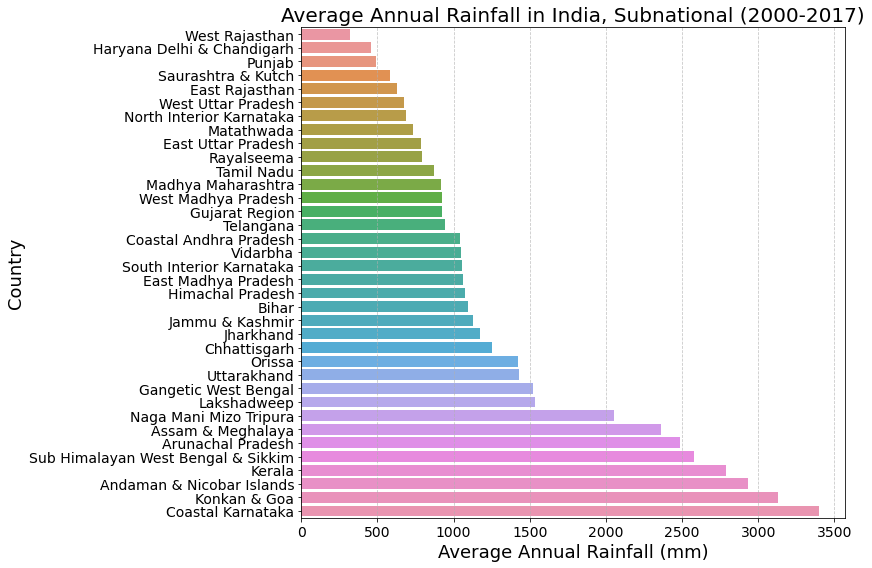

<Figure size 432x288 with 0 Axes>

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar(df, x_col, y_col, title, filename=False):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x=x_col, y=y_col)
    plt.xlabel("Average Annual Rainfall (mm)", size=18)
    plt.ylabel("Country", size=18)
    plt.title(title, size=20)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=120, bbox_inches='tight', transparent=False)
    plt.show()

plot_bar(
    df=df_plot,
    x_col='mean',
    y_col='SUBDIVISION',
    title='Average Annual Rainfall in India, Subnational (2000-2017)'
)

plt.savefig('../reports/rainfall_bar.png', dpi=120, bbox_inches='tight', transparent=False)
